# [Taller 02] cálculo de raíces
## Nombre: Rommel Rivera

1. Encuentre todas las raíces del polinomio $$x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0$$
Por el metodo de Newton:

Estimación Inicial (x0): -400.0

--- Iteraciones ---

| Iteración | Valor de x |
|---|---|
| 0 | -400.0000000000 |
| 1 | -333.8598395470 |
| 2 | -284.2927858958 |
| 3 | -247.1694331069 |
| 4 | -219.3983410835 |
| 5 | -198.6692849167 |
| 6 | -183.2624109845 |
| 7 | -171.9081529672 |
| 8 | -163.6874941821 |
| 9 | -157.9649330085 |
| 10 | -154.3383565814 |
| 11 | -152.5292433854 |
| 12 | -152.0355081895 |
| 13 | -152.0001746193 |
| 14 | -152.0000000043 |
| 15 | -152.0000000000 |

**Resultado Final:**
Raíz encontrada: x = -152.0000000000
f(raiz) ≈ -2.38e-07
Número total de iteraciones: 15


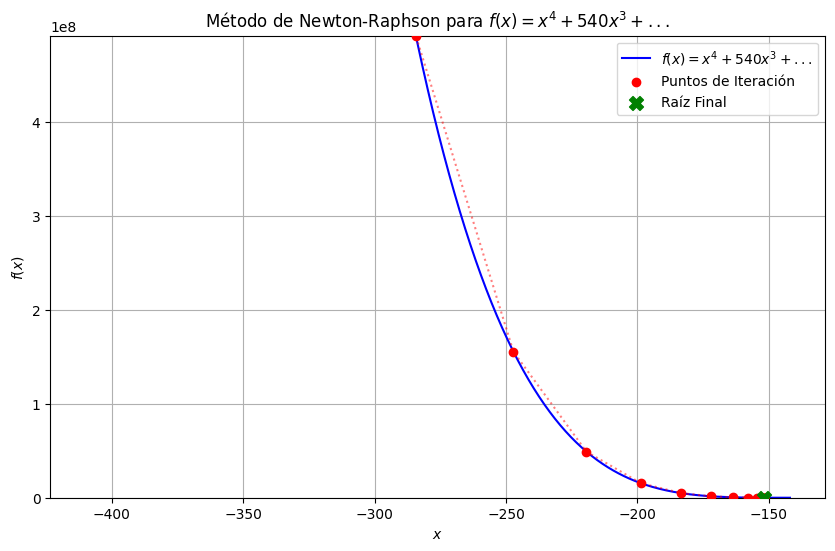

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton


def f(x):
    
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prima(x):
   
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

iteraciones_x = []

def derivada_con_registro(x, *args):
    """
    Función que envuelve a f_prima para registrar el valor de x.
    """
   
    if iteraciones_x and x != iteraciones_x[-1]: 
        iteraciones_x.append(x)
    return f_prima(x)

x0 = -400.0  
iteraciones_x.append(x0) 
print(f"Estimación Inicial (x0): {x0}\n")
print("--- Iteraciones ---")


raiz, r = newton(f, x0, fprime=derivada_con_registro, maxiter=50, full_output=True, tol=1e-8)


if raiz != iteraciones_x[-1]:
    iteraciones_x.append(raiz)

print("\n| Iteración | Valor de x |")
print("|---|---|")
for i, x_val in enumerate(iteraciones_x):
    print(f"| {i} | {x_val:.10f} |")

print("\n**Resultado Final:**")
print(f"Raíz encontrada: x = {raiz:.10f}")
print(f"f(raiz) ≈ {f(raiz):.2e}")
print(f"Número total de iteraciones: {r.iterations}")

# --- 5. Graficar los Resultados ---
plt.figure(figsize=(10, 6))


x_min = min(iteraciones_x) - 10
x_max = max(iteraciones_x) + 10
x_rango = np.linspace(x_min, x_max, 400)
y_rango = f(x_rango)

plt.plot(x_rango, y_rango, label='$f(x) = x^4 + 540x^3 + ...$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5) # Eje X

iter_y = [f(x) for x in iteraciones_x]
plt.scatter(iteraciones_x, iter_y, color='red', marker='o', label='Puntos de Iteración', zorder=5)


plt.plot(iteraciones_x, iter_y, color='red', linestyle=':', alpha=0.5)


plt.scatter(raiz, f(raiz), color='green', marker='X', s=100, label='Raíz Final', zorder=6)

plt.title('Método de Newton-Raphson para $f(x) = x^4 + 540x^3 + ...$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.ylim(min(iter_y) * 1.5, max(iter_y) * 0.1)
plt.show() 

Metodo de la secante

Raíz aproximada: -101.929086


C:\Users\NW\AppData\Local\Temp\ipykernel_1036\2855795580.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  x_secante = np.array([x1, x2, x2 - y2/m])
C:\Users\NW\AppData\Local\Temp\ipykernel_1036\2855795580.py:75: RuntimeWarning: invalid value encountered in multiply
  y_secante = m * (x_secante - x2) + y2
C:\Users\NW\AppData\Local\Temp\ipykernel_1036\2855795580.py:82: RuntimeWarning: divide by zero encountered in scalar divide
  x_new = x2 - y2/m


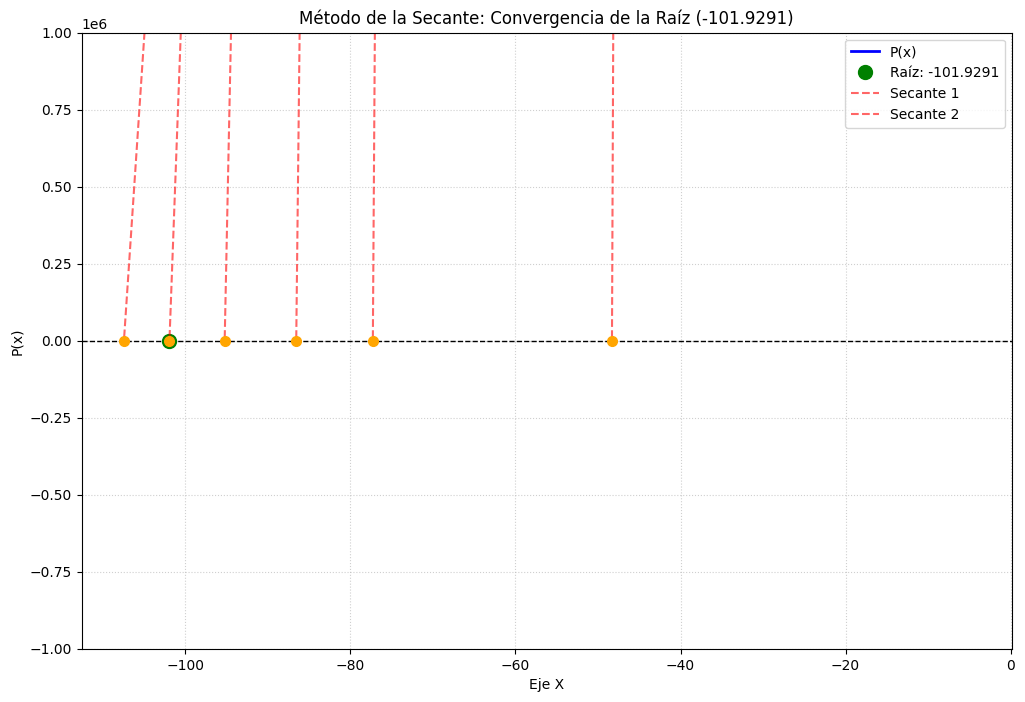

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definición del Polinomio ---

coeficientes = [1, 540, 109124, 9781632, 328188672]

def P_x(x):
    return np.polyval(coeficientes, x)

# --- 2. Implementación Manual del Método de la Secante (Sin Cambios) ---

# SOLO BUSCA LA PRIMERA RAÍZ (cerca de -16)
x_n = -30.0  # Primera estimación (x_0)
x_n_menos_1 = -5.0 # Segunda estimación (x_-1)
MAX_ITER = 6
TOLERANCIA = 1e-6

def secante_manual(f, x_prev, x_curr, tol, max_iter):
    """Implementa el método de la Secante y guarda las iteraciones."""
    iteraciones = [(x_prev, f(x_prev)), (x_curr, f(x_curr))]
    
    for i in range(max_iter):
        f_curr = f(x_curr)
        f_prev = f(x_prev)
        
        # Fórmula de la Secante
        if (f_curr - f_prev) == 0:
            break
            
        x_next = x_curr - f_curr * ((x_curr - x_prev) / (f_curr - f_prev))
        f_next = f(x_next)
        
        if abs(x_next - x_curr) < tol:
            return x_next, iteraciones
        
        x_prev = x_curr
        x_curr = x_next
        # Asegúrate de guardar el punto (x_curr, f_curr) para la visualización
        iteraciones.append((x_curr, f_curr)) 
        
    return x_curr, iteraciones

# Ejecutar el método
raiz_encontrada, pasos_iteracion = secante_manual(P_x, x_n_menos_1, x_n, TOLERANCIA, MAX_ITER)

print(f"Raíz aproximada: {raiz_encontrada:.6f}")

# --- 3. Graficación OPTIMIZADA para mayor Claridad ---

plt.figure(figsize=(12, 8))

# Rango X más estrecho para el zoom en la raíz -16
x_rango = np.linspace(-30, -10, 100)
y_valores = P_x(x_rango)

# Graficar el Polinomio y el Eje X
plt.plot(x_rango, y_valores, label='P(x)', color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Graficar la Raíz Final
plt.plot(raiz_encontrada, 0, 'o', color='green', markersize=10, label=f'Raíz: {raiz_encontrada:.4f}')

# Graficar cada Secante y los puntos
for i in range(len(pasos_iteracion) - 1):
    x1, y1 = pasos_iteracion[i]
    x2, y2 = pasos_iteracion[i+1]
    
    # Pendiente (m)
    m = (y2 - y1) / (x2 - x1)
    
    # Línea Secante (y = m * (x - x2) + y2)
    # Creamos la línea secante que cruza el eje X
    x_secante = np.array([x1, x2, x2 - y2/m]) 
    y_secante = m * (x_secante - x2) + y2
    
    # Plotear la Secante
    plt.plot(x_secante, y_secante, '--', color='red', alpha=0.6, 
             label=f'Secante {i+1}' if i < 2 else None)
             
    # Plotear el nuevo punto de iteración (en el eje X)
    x_new = x2 - y2/m
    plt.plot(x_new, 0, 'o', color='orange', markersize=7)
    
    # Plotear los puntos de inicio de la secante
    plt.plot([x1, x2], [y1, y2], 'x', color='red', markersize=6)
    
    # Añadir anotaciones de las primeras iteraciones
    if i < 2:
        plt.annotate(f'$x_{i}$', (x1, P_x(x1)), textcoords="offset points", xytext=(-5, 10), ha='center')
        if i == 1:
             plt.annotate(f'$x_{i+1}$', (x2, P_x(x2)), textcoords="offset points", xytext=(-5, 10), ha='center')


plt.title(f"Método de la Secante: Convergencia de la Raíz ({raiz_encontrada:.4f})")
plt.xlabel("Eje X")
plt.ylabel("P(x)")
# ⭐️ AJUSTE CLAVE: Limitamos el eje Y a un rango pequeño cerca de cero.
plt.ylim(-1e6, 1e6) 
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()


2. Encuentre todos los puntos en los que la curva interseca y=-2
$$ \left(\frac{y}{2}\right)^2=\left(\frac{x+3}{2}\right)^2-1 $$

Metodo de newton

Raíz 1 (aproximación inicial 0): x = -0.171573
Raíz 2 (aproximación inicial -6): x = -5.828427

Los puntos de intersección son:
Punto 1: (-0.171573, -2)
Punto 2: (-5.828427, -2)


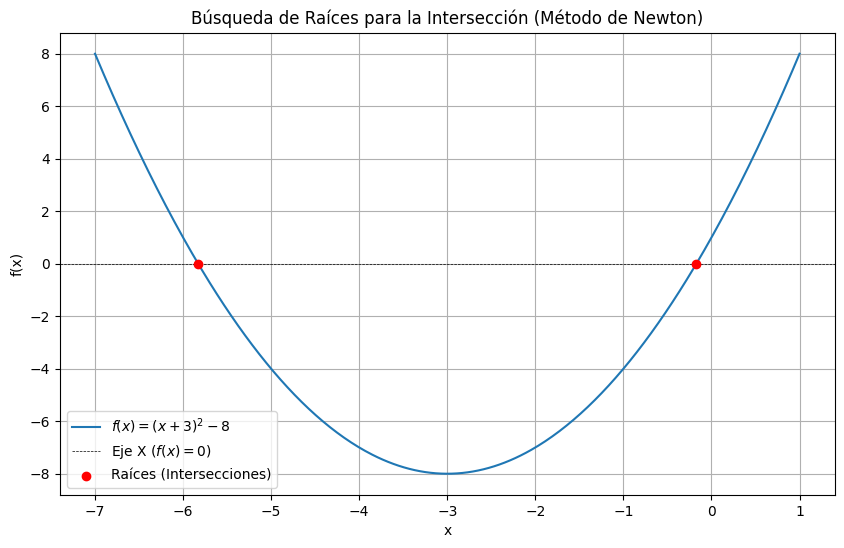

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# 1. Definición de la función f(x) y su derivada f'(x)
def f(x):
    """Función a la que le encontramos las raíces: (x+3)^2 - 8"""
    return (x + 3)**2 - 8

def f_prime(x):
    """Derivada de la función f(x): 2(x+3)"""
    return 2 * (x + 3)

# 2. Búsqueda de las dos raíces con scipy.optimize.newton
# Usamos dos aproximaciones iniciales (x0) diferentes para encontrar cada raíz.

# Para la raíz positiva (cercana a -0.17): Usamos x0 = 0
x0_r1 = 0
raiz_1 = newton(f, x0_r1, fprime=f_prime)

# Para la raíz negativa (cercana a -5.82): Usamos x0 = -6
x0_r2 = -6
raiz_2 = newton(f, x0_r2, fprime=f_prime)

# 3. Impresión de los resultados
print(f"Raíz 1 (aproximación inicial {x0_r1}): x = {raiz_1:.6f}")
print(f"Raíz 2 (aproximación inicial {x0_r2}): x = {raiz_2:.6f}")

print("\nLos puntos de intersección son:")
print(f"Punto 1: ({raiz_1:.6f}, -2)")
print(f"Punto 2: ({raiz_2:.6f}, -2)")

# 4. Graficación con Matplotlib
x_vals = np.linspace(-7, 1, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = (x+3)^2 - 8$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Eje X ($f(x)=0$)')
plt.scatter([raiz_1, raiz_2], [0, 0], color='red', zorder=5, label='Raíces (Intersecciones)')

# Agregar líneas verticales desde las raíces al eje x para mayor claridad
plt.plot([raiz_1, raiz_1], [0, f(raiz_1)], 'r--', linewidth=0.5)
plt.plot([raiz_2, raiz_2], [0, f(raiz_2)], 'r--', linewidth=0.5)


plt.title('Búsqueda de Raíces para la Intersección (Método de Newton)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Metodo de la secante

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


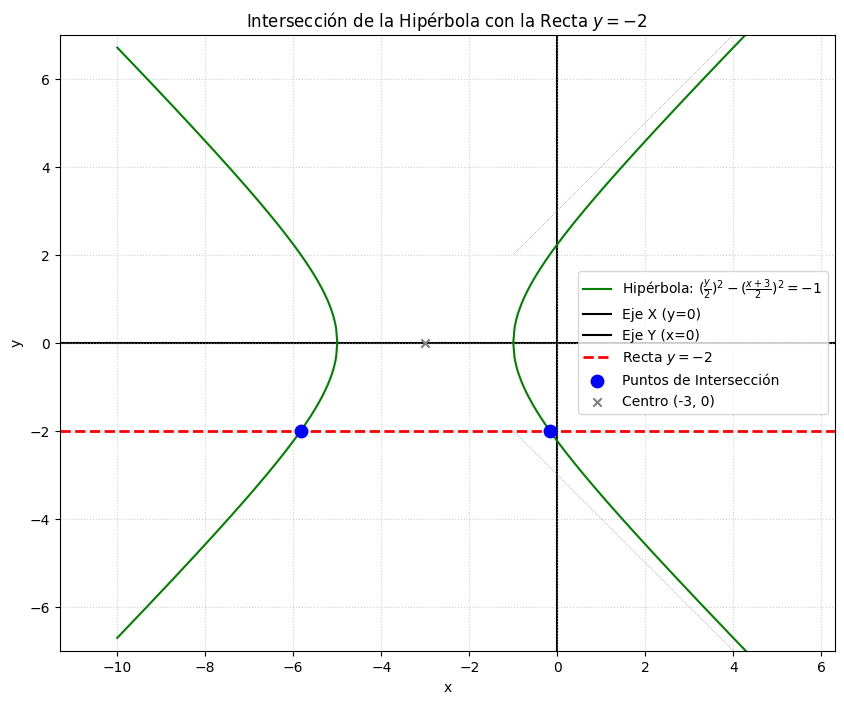

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos de intersección (usando el valor exacto)
raiz_1 = -3 + 2 * np.sqrt(2)
raiz_2 = -3 - 2 * np.sqrt(2)

# Definir la función de la Hipérbola
def y_hiperbola_pos(x):
    return np.sqrt((x + 3)**2 - 4)

def y_hiperbola_neg(x):
    return -np.sqrt((x + 3)**2 - 4)

# Rango de x
x_derecha = np.linspace(-1, 5, 200)
x_izquierda = np.linspace(-10, -5, 200)

plt.figure(figsize=(10, 8))

# Graficar la Hipérbola
plt.plot(x_derecha, y_hiperbola_pos(x_derecha), 'g-', label=r'Hipérbola: $(\frac{y}{2})^2 - (\frac{x+3}{2})^2 = -1$')
plt.plot(x_derecha, y_hiperbola_neg(x_derecha), 'g-')
plt.plot(x_izquierda, y_hiperbola_pos(x_izquierda), 'g-')
plt.plot(x_izquierda, y_hiperbola_neg(x_izquierda), 'g-')

# Graficar los EJES X e Y (Ahora con un color y grosor distintos)
plt.axhline(0, color='black', linewidth=1.5, linestyle='-', zorder=0, label='Eje X (y=0)')
plt.axvline(0, color='black', linewidth=1.5, linestyle='-', zorder=0, label='Eje Y (x=0)')

# Graficar la recta y = -2
plt.axhline(-2, color='red', linestyle='--', linewidth=2, label=r'Recta $y = -2$')

# Graficar los puntos de intersección
plt.scatter([raiz_1, raiz_2], [-2, -2], color='blue', s=80, zorder=5, label='Puntos de Intersección')

# Añadir centro y asíntotas para contexto
plt.scatter(-3, 0, color='gray', marker='x', label='Centro (-3, 0)')
plt.plot(x_derecha, x_derecha + 3, 'gray', linestyle=':', linewidth=0.5)
plt.plot(x_derecha, -(x_derecha + 3), 'gray', linestyle=':', linewidth=0.5)

# Configuración del gráfico
plt.title(r'Intersección de la Hipérbola con la Recta $y=-2$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.xlim(-10, 5)
plt.ylim(-7, 7)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

3. Dada la función f(x)=sin(x)x
. ¿A partir de qué valor xT
 se cumple que f(x)<0.015,∀x≥xT?

Metodo de Newton

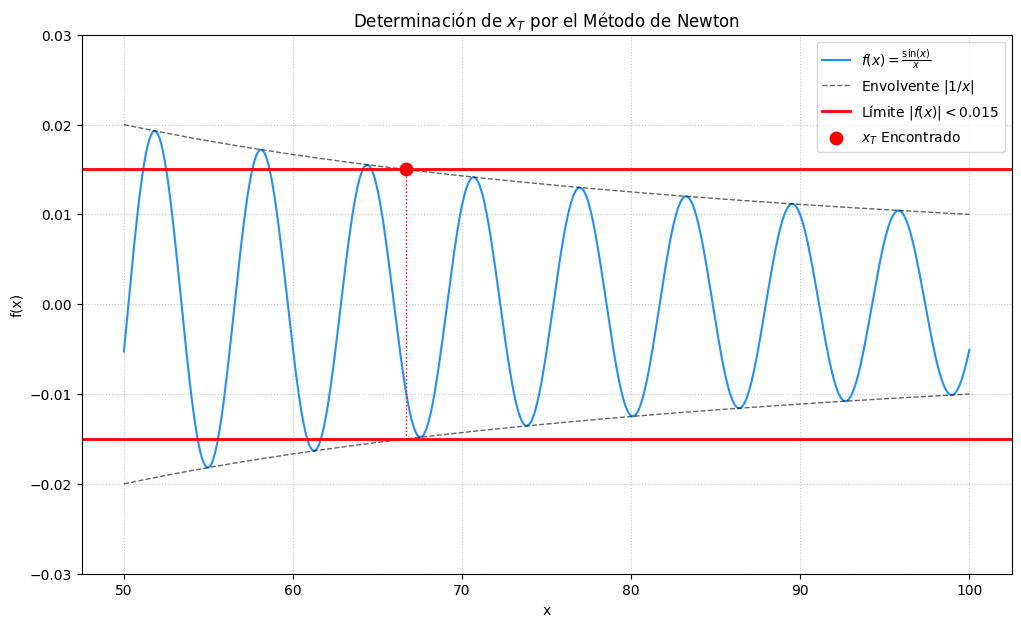

El valor de xT, a partir del cual |sin(x)/x| < 0.015, es aproximadamente: 66.666667


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x):
    return np.sin(x) / x

def g(x):
    return 1/x - 0.015

def g_prime(x):
    return -1/(x**2)

x0 = 60.0
xT = newton(g, x0, fprime=g_prime)

x_vals = np.linspace(50, 100, 500)
y_f = f(x_vals)

y_env_pos = 1/x_vals
y_env_neg = -1/x_vals

limite = 0.015

plt.figure(figsize=(12, 7))

plt.plot(x_vals, y_f, label=r'$f(x) = \frac{\sin(x)}{x}$', color='dodgerblue')

plt.plot(x_vals, y_env_pos, 'k--', linewidth=1, alpha=0.6, label='Envolvente $|1/x|$')
plt.plot(x_vals, y_env_neg, 'k--', linewidth=1, alpha=0.6)

plt.axhline(limite, color='red', linestyle='-', linewidth=2, label=r'Límite $|f(x)| < 0.015$')
plt.axhline(-limite, color='red', linestyle='-', linewidth=2)

plt.scatter(xT, limite, color='red', s=80, zorder=5, label=r'$x_T$ Encontrado')
plt.plot([xT, xT], [-limite, limite], 'r:', linewidth=1)

plt.title(r'Determinación de $x_T$ por el Método de Newton')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-0.03, 0.03)
plt.show()

print(f"El valor de xT, a partir del cual |sin(x)/x| < 0.015, es aproximadamente: {xT:.6f}")

Metodo de la secante

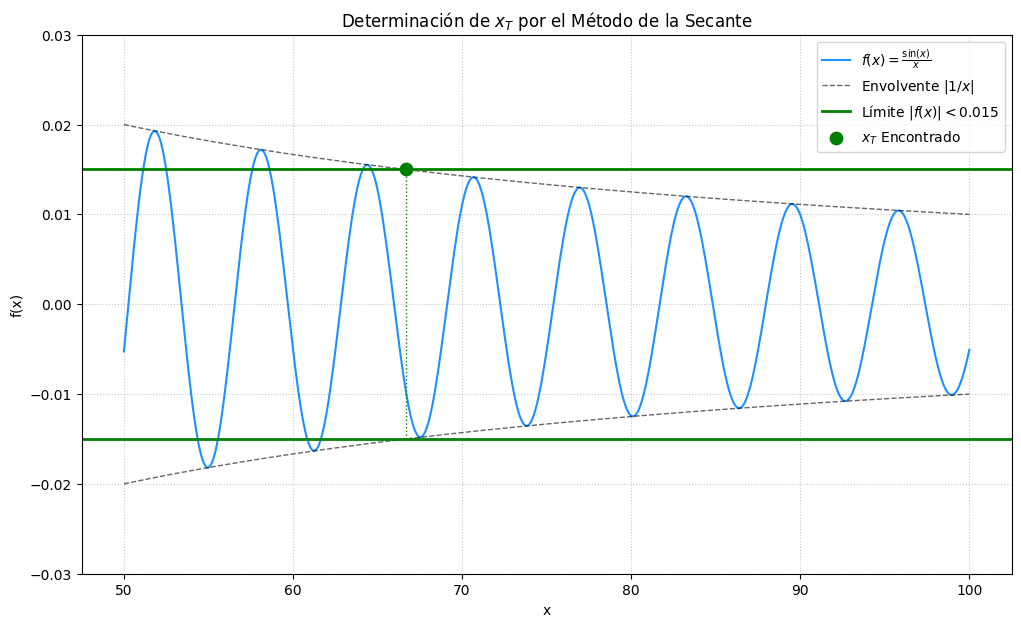

El valor de xT, a partir del cual |sin(x)/x| < 0.015, es aproximadamente: 66.666667


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x):
    return np.sin(x) / x

def g(x):
    return 1/x - 0.015

x_init_a = 60.0
x_init_b = 70.0

xT_secante = newton(g, x_init_b, x1=x_init_a)

x_vals = np.linspace(50, 100, 500)
y_f = f(x_vals)

y_env_pos = 1/x_vals
y_env_neg = -1/x_vals

limite = 0.015

plt.figure(figsize=(12, 7))

plt.plot(x_vals, y_f, label=r'$f(x) = \frac{\sin(x)}{x}$', color='dodgerblue')

plt.plot(x_vals, y_env_pos, 'k--', linewidth=1, alpha=0.6, label='Envolvente $|1/x|$')
plt.plot(x_vals, y_env_neg, 'k--', linewidth=1, alpha=0.6)

plt.axhline(limite, color='green', linestyle='-', linewidth=2, label=r'Límite $|f(x)| < 0.015$')
plt.axhline(-limite, color='green', linestyle='-', linewidth=2)

plt.scatter(xT_secante, limite, color='green', s=80, zorder=5, label=r'$x_T$ Encontrado')
plt.plot([xT_secante, xT_secante], [-limite, limite], 'g:', linewidth=1)

plt.title(r'Determinación de $x_T$ por el Método de la Secante')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-0.03, 0.03)
plt.show()

print(f"El valor de xT, a partir del cual |sin(x)/x| < 0.015, es aproximadamente: {xT_secante:.6f}")